## 資料來源
Skin Cancer MNIST: HAM10000 https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000

### 資料準備

In [ ]:
#keras.utils: 做one-hot encoding用
#sklearn.model_selection: 分割訓練集和測試集
#os: 用來建立檔案、刪除檔案
#PIL: (圖像處理庫)匯入圖像
#seed: 設定種子，使每次隨機產生的資料有相同結果。可將數字改成自己的學號(或其他數字)
import numpy as np
import pandas as pd
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import os
from PIL import Image
np.random.seed(408570291)

In [ ]:
#7項皮膚疾病簡稱與全名
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [ ]:
pd.Categorical(lesion_type_dict).codes

array([5, 4, 2, 1, 0, 6, 3], dtype=int8)

In [ ]:
# Download from Google Drive
!gdown --id 1orCwIp_avT4Yg9lCT8pjImwzqBg4_xiI
!unzip project03.zip

Downloading...
From: https://drive.google.com/uc?id=1orCwIp_avT4Yg9lCT8pjImwzqBg4_xiI
To: /content/project03.zip
100% 26.6M/26.6M [00:00<00:00, 162MB/s]
Archive:  project03.zip
replace project3_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: project3_test.csv       
  inflating: project3_train.csv      


In [ ]:
#讀取影像資料，28*28*3個像素值欄位(pixel0000-pixel2351) + 1個分類類別欄位label
load_img = pd.read_csv('project3_train.csv')

In [ ]:
#列出data的標籤
load_img.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,pixel0010,pixel0011,pixel0012,pixel0013,pixel0014,pixel0015,pixel0016,pixel0017,pixel0018,pixel0019,pixel0020,pixel0021,pixel0022,pixel0023,pixel0024,pixel0025,pixel0026,pixel0027,pixel0028,pixel0029,pixel0030,pixel0031,pixel0032,pixel0033,pixel0034,pixel0035,pixel0036,pixel0037,pixel0038,pixel0039,...,pixel2313,pixel2314,pixel2315,pixel2316,pixel2317,pixel2318,pixel2319,pixel2320,pixel2321,pixel2322,pixel2323,pixel2324,pixel2325,pixel2326,pixel2327,pixel2328,pixel2329,pixel2330,pixel2331,pixel2332,pixel2333,pixel2334,pixel2335,pixel2336,pixel2337,pixel2338,pixel2339,pixel2340,pixel2341,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,30,15,20,35,19,27,94,69,73,152,124,120,183,147,139,198,157,157,205,162,166,212,173,178,218,184,184,218,179,176,219,181,174,219,178,184,219,179,190,217,...,210,168,170,209,168,170,199,152,151,192,140,140,188,147,152,157,119,111,107,73,70,48,29,36,35,18,24,33,17,20,22,9,13,11,2,4,9,1,0,0
1,1,0,0,7,1,5,103,56,68,192,136,143,208,156,164,210,161,169,208,159,160,205,153,149,208,154,151,211,160,161,212,162,165,214,167,171,215,170,173,208,...,202,152,154,202,153,154,203,149,145,201,145,141,203,155,151,206,161,160,207,164,166,205,162,159,205,166,166,196,149,151,127,72,74,24,5,6,0,1,1,0
2,129,91,92,182,145,145,205,169,168,189,154,154,194,162,162,210,176,173,209,176,175,212,183,183,215,189,194,217,190,199,218,191,201,218,190,197,218,190,201,217,...,210,177,179,215,184,187,211,176,174,212,175,176,215,186,190,215,187,193,203,170,162,196,158,150,181,144,141,139,104,99,64,39,41,5,2,6,2,2,1,0
3,9,8,8,11,10,10,10,9,9,24,15,15,107,86,81,194,175,169,223,202,200,228,209,209,229,208,208,230,207,208,229,205,202,228,208,205,224,197,189,220,...,204,131,112,208,145,134,211,155,146,212,167,165,212,175,175,213,182,185,188,161,159,105,80,75,26,16,14,9,8,9,11,9,10,8,7,7,5,5,5,0
4,26,13,19,25,10,17,24,6,5,23,4,0,29,12,12,43,28,42,45,29,43,53,33,40,113,74,80,149,107,116,163,118,127,174,131,139,178,133,138,175,...,171,117,139,174,125,144,168,115,129,173,128,146,172,127,144,158,96,109,152,99,110,135,94,100,92,59,64,43,24,31,22,6,9,27,9,10,23,5,6,0


In [ ]:
#檢查讀取圖片的大小與數量
load_img.shape

(8008, 2353)

In [ ]:
load_img.iloc[: , :-1].values

array([[ 30,  15,  20, ...,   9,   1,   0],
       [  1,   0,   0, ...,   0,   1,   1],
       [129,  91,  92, ...,   2,   2,   1],
       ...,
       [127, 101, 108, ..., 121, 108, 125],
       [157,  82,  86, ..., 210, 126, 130],
       [176, 149, 166, ..., 175, 142, 159]])

In [ ]:
#iloc選取特定範圍，讀取種類編號
X_img , y_label = load_img.iloc[: , :-1].values , load_img.iloc[: , -1].values

In [ ]:
#將串列轉成矩陣
X_img_train = np.asarray(X_img.tolist())

#將一維的數據，轉換成三維(長*寬*RGB三色)
X_img_train=X_img_train.reshape(X_img_train.shape[0],28,28,3)

In [ ]:
#檢查學習資料的照片數量、尺寸大小、維度
print("train data:",'images:',X_img_train.shape," labels:",y_label.shape) 

train data: images: (8008, 28, 28, 3)  labels: (8008,)


In [ ]:
#標準化: 同除255(因為image的數字是0~255)
#X_img_train_normalize = X_img_train.astype('float32') / 255.0

In [ ]:
#使用np_utils.to_categorical()傳入各參數的label標籤欄位，再執行OneHot encoding (轉成0或1的組合)
#y_label_train_OneHot = np_utils.to_categorical(y_label)

In [ ]:
#檢查標籤總共有多少種分類
#這裡是共8008筆資料，每筆是7個0或1的組合
#y_label_train_OneHot.shape

### 建立與訓練CNN模型

In [ ]:
#匯入keras中的Sequential、layers模組(Dense、 Dropout、 Activation、 Flatten、Conv2D、 MaxPooling2D、 ZeroPadding2D)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [ ]:
# Design your CNN model\

#建立keras的Sequential模型
model_cnn = Sequential()


In [ ]:
model_cnn.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,3),
                     activation='relu',padding='same'))

model_cnn.add(Conv2D(filters=32,kernel_size=(3,3),
                     activation='relu',padding='same'))
model_cnn.add(Conv2D(filters=32,kernel_size=(3,3),
                     activation='relu',padding='same'))

model_cnn.add(MaxPooling2D(pool_size=(2,2)))



model_cnn.add(Conv2D(filters=64,kernel_size=(3,3),
                     activation='relu',padding='same'))
model_cnn.add(Conv2D(filters=64,kernel_size=(3,3),
                     activation='relu',padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))


model_cnn.add(Conv2D(filters=128,kernel_size=(3,3),
                     activation='relu',padding='same'))
model_cnn.add(Conv2D(filters=128,kernel_size=(3,3),
                     activation='relu',padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))


model_cnn.add(Conv2D(filters=256,kernel_size=(3,3),
                     activation='relu',padding='same'))
model_cnn.add(Conv2D(filters=256,kernel_size=(3,3),
                     activation='relu',padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))



model_cnn.add(Flatten())
model_cnn.add(Dense(64,activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(7,activation='softmax'))

In [ ]:
print(model_cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 conv2d_29 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_31 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_32 (Conv2D)          (None, 14, 14, 64)        36928     
                                                        

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss',patience=20, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=10, verbose=1, min_lr=1e-6)

In [ ]:
model_cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
epochs=150
batch_size=128

x_train, x_validate, y_train, y_validate = train_test_split(X_img_train_normalize, y_label_train_OneHot, test_size=0.2, shuffle=True)

#train_history=model_cnn.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_validate,y_validate), epochs=epochs, verbose=1, callbacks=None)#callbacks=[early_stopping,reduce_lr]

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc, yAxisName):
  plt.plot(train_history.history[train_acc])
  plt.plot(train_history.history[test_acc])
  plt.title('Train History')
  plt.ylabel(yAxisName)
  plt.xlabel('Epoch')
  plt.legend(['train','val'], loc='upper left')
  plt.show

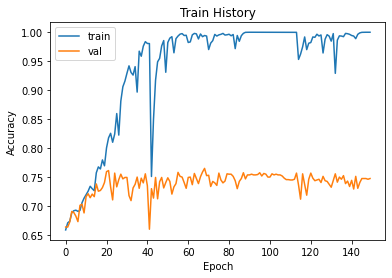

In [ ]:
show_train_history('accuracy','val_accuracy','Accuracy')

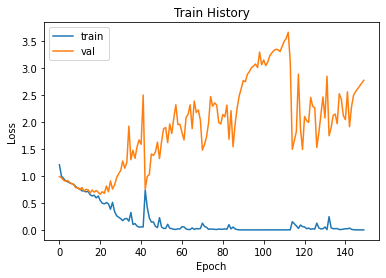

In [ ]:
show_train_history('loss','val_loss','Loss')

In [ ]:
scores = model_cnn.evaluate(x_validate, y_validate, verbose=0)
scores[1]

0.7478152513504028

In [ ]:
prediction = np.argmax(model_cnn.predict(x_validate), axis=-1)
pd.crosstab(np.argmax(y_validate, axis=-1), prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6
label,,,,,,,
0,18,9,12,1,5,0,3
1,13,42,15,3,16,0,5
2,7,9,74,0,58,0,18
3,1,5,0,6,5,0,1
4,2,16,29,3,961,3,50
5,1,4,0,0,6,15,2
6,4,5,25,0,67,1,82


In [ ]:
# 使用最後的模型進行測試資料預測
load_test_img = pd.read_csv('project3_test.csv')
img_test = load_test_img.values

In [ ]:
x_test=img_test.reshape(img_test.shape[0],28,28,3)
x_test_normalize = x_test.astype('float32') / 255.0

In [ ]:
df_submit = pd.DataFrame([], columns=['Id', 'Label'])
df_submit['Id'] = [f'{i:04d}' for i in range(len(x_test_normalize))]
df_submit['Label'] = np.argmax(model_cnn.predict(x_test_normalize), axis=-1)

In [ ]:
df_submit.to_csv('submission_CNN7.csv', index=None)

# CNN

In [ ]:
x_img_train, x_img_test, y_label_train, y_label_test = train_test_split(X_img_train_normalize, y_label_train_OneHot, test_size=0.2, random_state=2)

In [ ]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [ ]:
# 轉換分類標籤成one-hot encoding
y_label_train_OneHot = y_label_train
y_label_test_OneHot = y_label_test

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D  #捲機、池化

In [ ]:
# 搭建CNN模型的第一層
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,3),activation='relu', padding='same'))#激活函數

# 設計卷積層與池化層、平坦層、全連接層

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu', padding='same')) #可填入32/64
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3),activation='relu', padding='same')) #可填入32/64
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))  #可填入256/512
#model.add(Dropout(0.25)) #隨機丟棄

# 最後一層為輸出層
model.add(Dense(7, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 3, 128)       

In [ ]:
# 打包網路模型
model.compile(loss='categorical_crossentropy',
       optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
# 訓練網路模型
# 開始訓練 (記得確認是否已設定使用GPU的運算資源)
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=5, batch_size=4, verbose=1)  

Epoch 1/5
1281/1281 [==============================] - 8s 7ms/step - loss: 1.1520 - categorical_accuracy: 0.6694 - val_loss: 1.1102 - val_categorical_accuracy: 0.6786
Epoch 2/5
1281/1281 [==============================] - 8s 6ms/step - loss: 1.1467 - categorical_accuracy: 0.6694 - val_loss: 1.1079 - val_categorical_accuracy: 0.6786
Epoch 3/5
1281/1281 [==============================] - 8s 6ms/step - loss: 1.1441 - categorical_accuracy: 0.6694 - val_loss: 1.1197 - val_categorical_accuracy: 0.6786
Epoch 4/5
1281/1281 [==============================] - 8s 6ms/step - loss: 1.1428 - categorical_accuracy: 0.6694 - val_loss: 1.1319 - val_categorical_accuracy: 0.6786
Epoch 5/5
1281/1281 [==============================] - 8s 6ms/step - loss: 1.1411 - categorical_accuracy: 0.6694 - val_loss: 1.1087 - val_categorical_accuracy: 0.6786


In [ ]:
# 使用最後的模型進行測試資料預測
load_test_img = pd.read_csv('project3_test.csv')
img_test = load_test_img.values

In [ ]:
x_test=img_test.reshape(img_test.shape[0],28,28,3)
x_test_normalize = x_test.astype('float32') / 255.0

In [ ]:
df_submit = pd.DataFrame([], columns=['Id', 'Label'])
df_submit['Id'] = [f'{i:04d}' for i in range(len(x_test_normalize))]
df_submit['Label'] = np.argmax(model.predict(x_test_normalize), axis=-1)

In [ ]:
df_submit.to_csv('submission_CNN4.csv', index=None)